## CIFAR10 딥러닝 모델

### 데이터 로드 및 전처리

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import callbacks   # 콜백 사용시 필요
from tensorflow.keras import utils       # plot_model 사용시 필요

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
y_train_full = y_train_full.squeeze()
y_test = y_test.squeeze()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, 
                                                  random_state=123, stratify=y_train_full)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000,)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000,)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000,)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000,)


C:\Users\Administrator\AppData\Local\Temp;\ipykernel_7824\1019855555.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


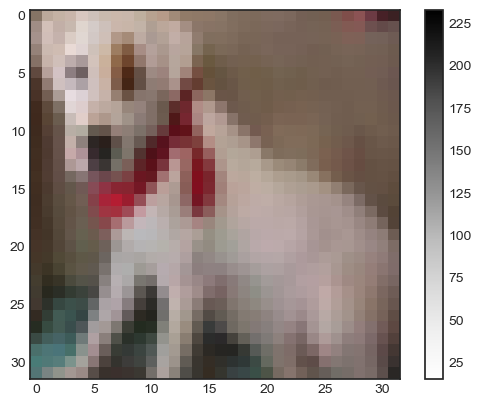

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

In [4]:
x_train = x_train.reshape(-1, 32*32*3)
x_val   = x_val.reshape(-1, 32*32*3)
x_test  = x_test.reshape(-1, 32*32*3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [5]:
x_train = x_train / 255.
x_val   = x_val / 255.
x_test  = x_test / 255.

### 모델 구성 및 컴파일

In [6]:
model = models.Sequential([
    layers.Input(shape=(32*32*3,)),
    layers.Dense(512, use_bias=False, kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(256, use_bias=False, kernel_initializer='he_normal'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1572864   
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131072    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                       

### 모델 학습

In [8]:
mc = callbacks.ModelCheckpoint('cifar10_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

history = model.fit(x_train, y_train, epochs=50, batch_size=512, 
                    validation_data=(x_val, y_val), callbacks=[mc, es], verbose=1)

Epoch 1/50
79/79 [==============================] - ETA: 0s - loss: 2.1056 - accuracy: 0.2890
Epoch 1: val_loss improved from inf to 2.16670, saving model to cifar10_best.h5
79/79 [==============================] - 4s 44ms/step - loss: 2.1056 - accuracy: 0.2890 - val_loss: 2.1667 - val_accuracy: 0.2780
Epoch 2/50
 3/79 [>.............................] - ETA: 3s - loss: 1.8658 - accuracy: 0.3314

c:\Users\Administrator\anaconda3\envs\ds_study\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


79/79 [==============================] - ETA: 0s - loss: 1.8024 - accuracy: 0.3621
Epoch 2: val_loss improved from 2.16670 to 1.75203, saving model to cifar10_best.h5
79/79 [==============================] - 4s 46ms/step - loss: 1.8024 - accuracy: 0.3621 - val_loss: 1.7520 - val_accuracy: 0.3815
Epoch 3/50
79/79 [==============================] - ETA: 0s - loss: 1.6784 - accuracy: 0.4019
Epoch 3: val_loss improved from 1.75203 to 1.73406, saving model to cifar10_best.h5
79/79 [==============================] - 3s 41ms/step - loss: 1.6784 - accuracy: 0.4019 - val_loss: 1.7341 - val_accuracy: 0.3714
Epoch 4/50
79/79 [==============================] - ETA: 0s - loss: 1.6041 - accuracy: 0.4251
Epoch 4: val_loss did not improve from 1.73406
79/79 [==============================] - 3s 40ms/step - loss: 1.6041 - accuracy: 0.4251 - val_loss: 1.7399 - val_accuracy: 0.3781
Epoch 5/50
79/79 [==============================] - ETA: 0s - loss: 1.5582 - accuracy: 0.4426
Epoch 5: val_loss improved fro

### 모델 평가 및 예측

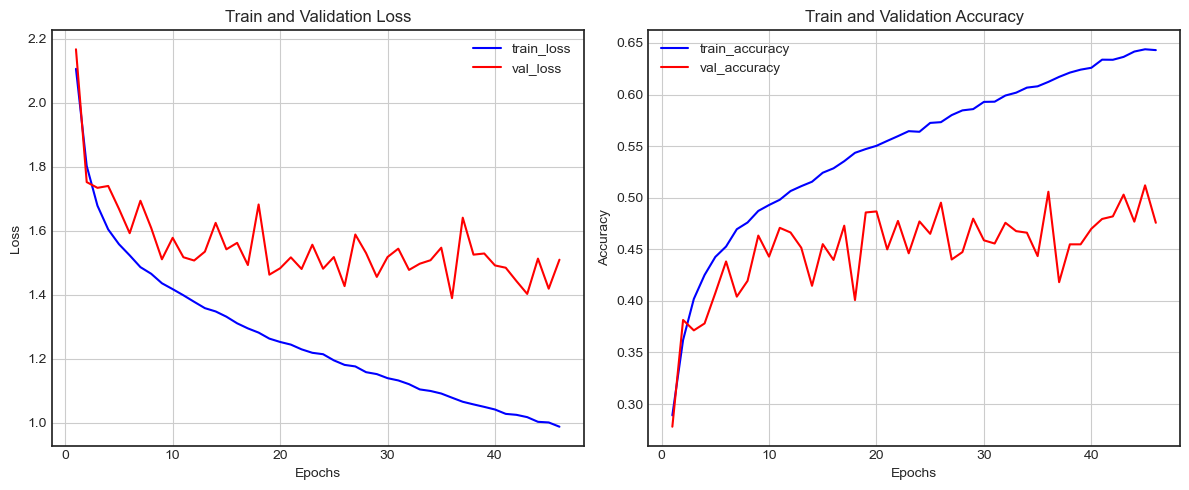

In [9]:
hist = history.history
epochs = range(1, len(hist['loss']) + 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(epochs, hist['loss'], 'b-', label='train_loss')
ax[0].plot(epochs, hist['val_loss'], 'r-', label='val_loss')
ax[0].set_title('Train and Validation Loss'); ax[0].set_xlabel('Epochs'); ax[0].set_ylabel('Loss')
ax[0].grid(); ax[0].legend()

ax[1].plot(epochs, hist['accuracy'], 'b-', label='train_accuracy')
ax[1].plot(epochs, hist['val_accuracy'], 'r-', label='val_accuracy')
ax[1].set_title('Train and Validation Accuracy'); ax[1].set_xlabel('Epochs'); ax[1].set_ylabel('Accuracy')
ax[1].grid(); ax[1].legend()

plt.tight_layout(); plt.show()

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3979 - accuracy: 0.4972


[1.3978514671325684, 0.49720001220703125]

---
## 추가 실습

### CNN + Aug + 정규화

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models, regularizers, optimizers, callbacks

tf.keras.utils.set_random_seed(42)

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

y_train_full = y_train_full.squeeze()
y_test = y_test.squeeze()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, 
                                                  random_state=123, stratify=y_train_full)

def ensure_image_shape(X):
    X = np.asarray(X)
    if X.ndim == 2: 
        X = X.reshape(-1, 32, 32, 3)
    return X

x_train = ensure_image_shape(x_train)
x_val   = ensure_image_shape(x_val)
x_test  = ensure_image_shape(x_test)

print("Train :", x_train.shape, y_train.shape)
print("Valid :", x_val.shape,   y_val.shape)
print("Test  :", x_test.shape,  y_test.shape)

Train : (40000, 32, 32, 3) (40000,)
Valid : (10000, 32, 32, 3) (10000,)
Test  : (10000, 32, 32, 3) (10000,)


In [ ]:
input_shape = (32, 32, 3)
num_classes = 10

def build_cifar10_improved(input_shape=(32,32,3), num_classes=10, wd=1e-4, dp=0.3, lr=1e-3, label_smooth=0.05):
    aug = tf.keras.Sequential([layers.RandomFlip("horizontal"), layers.RandomRotation(0.03), 
                               layers.RandomTranslation(0.05, 0.05)], name="augment")

    def conv_block(x, f):
        x = layers.Conv2D(f, 3, padding='same', use_bias=False, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(wd))(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        return x

    inp = layers.Input(shape=input_shape)
    x = layers.Rescaling(1./255)(inp)     
    x = aug(x)

    x = conv_block(x,64)
    x = conv_block(x,64)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(dp)(x)

    x = conv_block(x,128)
    x = conv_block(x,128)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(dp)(x)

    x = conv_block(x,256)
    x = conv_block(x,256)
    x = layers.MaxPooling2D()(x)
    x = layers.Dropout(dp)(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(wd))(x)
    x = layers.Dropout(dp)(x)
    out = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inp, out)

    opt = optimizers.AdamW(learning_rate=lr, weight_decay=wd)
    loss = tf.keras.losses.SparseCategoricalCrossentropy()
    model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
    return model

mc = callbacks.ModelCheckpoint('cifar10_improved_best.h5', monitor='val_loss', save_best_only=True, verbose=1)
es = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
rlr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5, verbose=1)

model = build_cifar10_improved(input_shape=input_shape, num_classes=num_classes, wd=1e-4, dp=0.4, lr=1e-3)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 augment (Sequential)        (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1728      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 32, 32, 64)        0         
                                                             

In [5]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, 
                    batch_size=128, callbacks=[mc, es, rlr], verbose=1)

Epoch 1/50
313/313 [==============================] - ETA: 0s - loss: 1.5089 - accuracy: 0.5321
Epoch 1: val_loss improved from inf to 2.23223, saving model to cifar10_improved_best.h5
313/313 [==============================] - 370s 1s/step - loss: 1.5089 - accuracy: 0.5321 - val_loss: 2.2322 - val_accuracy: 0.4416 - lr: 0.0010
Epoch 2/50


c:\Users\Administrator\anaconda3\envs\ds_study\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - ETA: 0s - loss: 1.3375 - accuracy: 0.5932
Epoch 2: val_loss improved from 2.23223 to 1.46839, saving model to cifar10_improved_best.h5
313/313 [==============================] - 336s 1s/step - loss: 1.3375 - accuracy: 0.5932 - val_loss: 1.4684 - val_accuracy: 0.5952 - lr: 0.0010
Epoch 3/50
313/313 [==============================] - ETA: 0s - loss: 1.2328 - accuracy: 0.6374
Epoch 3: val_loss improved from 1.46839 to 1.45103, saving model to cifar10_improved_best.h5
313/313 [==============================] - 331s 1s/step - loss: 1.2328 - accuracy: 0.6374 - val_loss: 1.4510 - val_accuracy: 0.6062 - lr: 0.0010
Epoch 4/50
313/313 [==============================] - ETA: 0s - loss: 1.1436 - accuracy: 0.6676
Epoch 4: val_loss improved from 1.45103 to 1.29355, saving model to cifar10_improved_best.h5
313/313 [==============================] - 304s 972ms/step - loss: 1.1436 - accuracy: 0.6676 - val_loss: 1.2935 - val_accuracy: 0.6257 - lr: 0.0010
Epoch 

[Train] final loss=0.4308, acc=0.9020
[Valid] best  loss=0.5222 (epoch 47), acc@best=0.8798


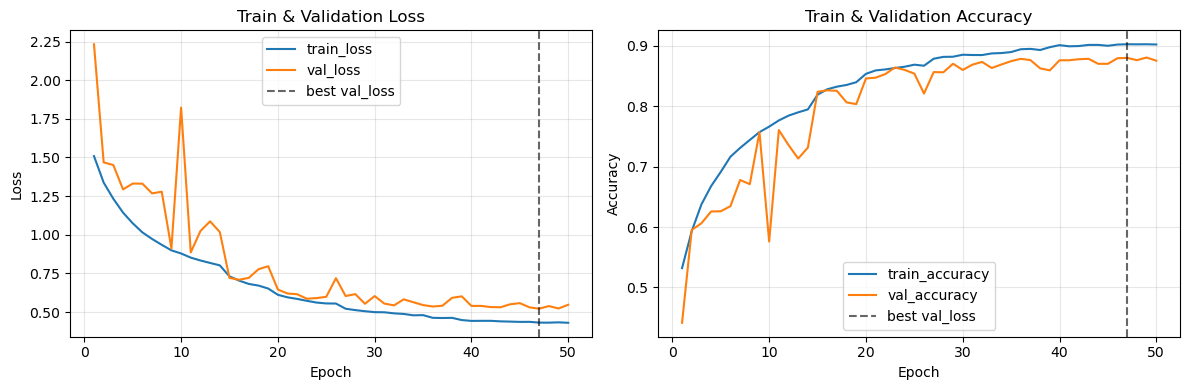

In [6]:
import matplotlib.pyplot as plt

H = history.history
epochs = range(1, len(H['loss']) + 1)
acc = H.get('accuracy')
val_acc = H.get('val_accuracy')
best_idx = int(np.argmin(H['val_loss']))

print(f"[Train] final loss={H['loss'][-1]:.4f}, acc={acc[-1]:.4f}")
print(f"[Valid] best  loss={H['val_loss'][best_idx]:.4f} (epoch {best_idx+1}), acc@best={val_acc[best_idx]:.4f}")

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(epochs, H['loss'], label='train_loss')
ax[0].plot(epochs, H['val_loss'], label='val_loss')
ax[0].axvline(best_idx+1, color='k', linestyle='--', alpha=0.6, label='best val_loss')
ax[0].set_title('Train & Validation Loss')
ax[0].set_xlabel('Epoch'); ax[0].set_ylabel('Loss'); ax[0].grid(True, alpha=0.3); ax[0].legend()

ax[1].plot(epochs, acc, label='train_accuracy')
ax[1].plot(epochs, val_acc, label='val_accuracy')
ax[1].axvline(best_idx+1, color='k', linestyle='--', alpha=0.6, label='best val_loss')
ax[1].set_title('Train & Validation Accuracy')
ax[1].set_xlabel('Epoch'); ax[1].set_ylabel('Accuracy'); ax[1].grid(True, alpha=0.3); ax[1].legend()
plt.tight_layout(); plt.show()

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"[TEST] loss={test_loss:.4f}  acc={test_acc:.4f}")

[TEST] loss=0.5765  acc=0.8664
